# Data Collection & Preparation

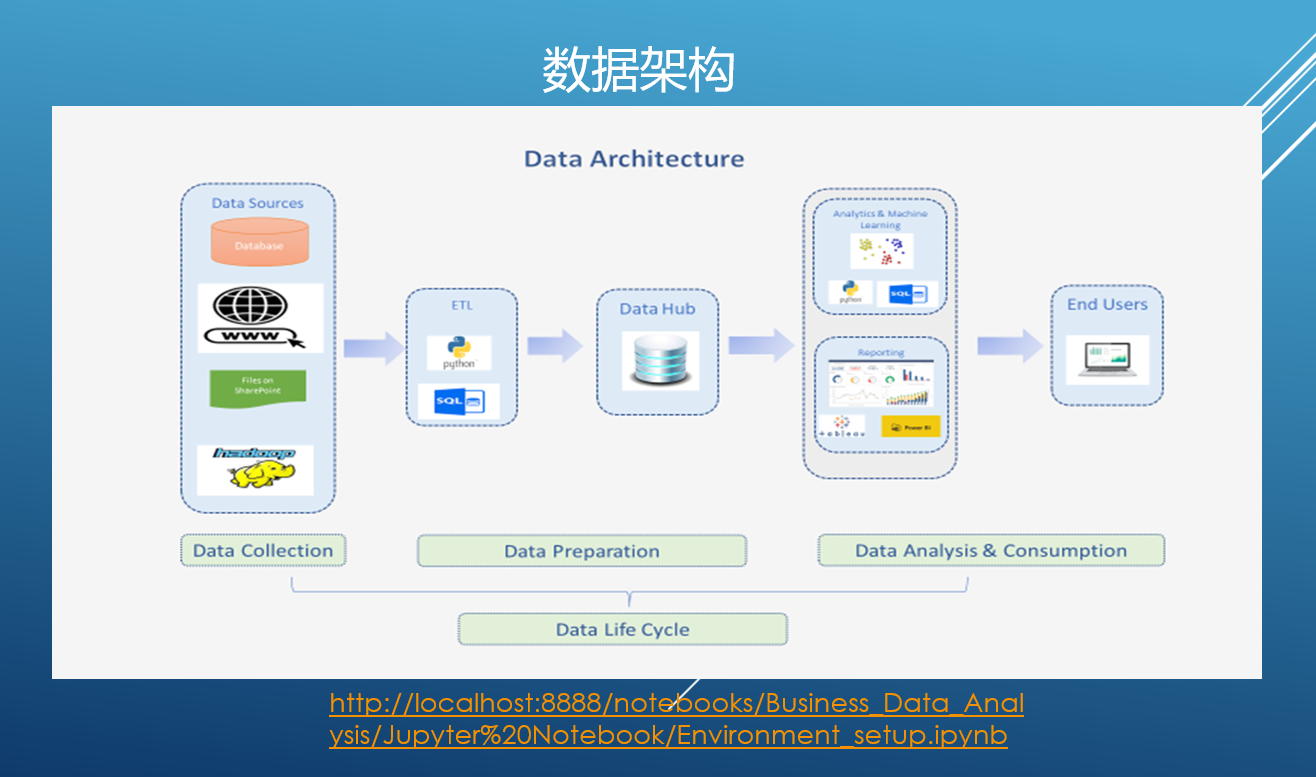

## 1.Import python packages

In [39]:
import pandas as pd
import numpy as np
import os
file_path='C:/Business_Data_Analysis/data/'
# file_path=os.environ['USERPROFILE']+'/Business_Data_Analysis/'

# %pip install nbconvert

## 2.Establish connection to database

In [40]:
import pyodbc
import urllib
import sqlalchemy

'''sources databases'''
params_p = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=DataWarehouse1;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_p = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_p))


params_s = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=DataWarehouse2;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_s = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_s))



'''destination databases'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

## 4.ETL data to datahub

In [41]:
df_Facebook=pd.read_excel(file_path+'Facebook_Data_Paid_Social.xlsx')

df_Facebook.to_sql('Facebook_Data_Paid_Social',engine_datahub,if_exists='replace',index=False)

df_PPC=pd.read_excel(file_path+'PPC.xlsx')

df_PPC.to_sql('PPC',engine_datahub,if_exists='replace',index=False)


In [42]:
df_Facebooks = pd.read_sql_table('Facebook_Data_Paid_Social',engine_datahub)
df_PPcs =pd.read_sql_table('PPC',engine_datahub)

### i. Option 1: using python

In [43]:
'''drop duplicate'''
df_Facebooks.drop_duplicates(keep='first', inplace=True)
df_PPcs.drop_duplicates(keep='first', inplace=True)


In [44]:
df_PPcs

,Campaign,Campaign type,Target,Month Num,Impressions,Clicks,Cost,Conv.,Conv. value,Search Impr. share
0,Brand Broad - US,Search,Brand,1,199459,7031,20991.30,133.59,9219.96,0.2827
1,Brand Canada - Exact,Search,Brand,5,57559,30953,28582.74,2877.81,230636.14,0.9964
2,Brand Canada - Exact,Search,Brand,3,71612,36139,20214.73,3160.53,250553.12,0.9971
3,Brand Canada - Exact,Search,Brand,9,55672,32390,22361.00,2887.56,230553.02,0.9365
4,Brand Canada - Exact,Search,Brand,8,58707,34521,25030.49,3327.54,270112.76,0.9966
...,...,...,...,...,...,...,...,...,...,...
990,Unidays - Exact - US,Search,NB,4,308,133,259.86,53.12,2584.04,0.6815
991,Unidays - Exact - US,Search,NB,5,464,182,436.71,50.88,2713.62,0.7636
992,Unidays - Exact - US,Search,NB,6,252,105,232.57,37.26,1793.69,0.7368
993,Unidays - Exact - US,Search,NB,1,400,76,188.05,24.45,1408.19,0.4333


In [48]:
df_PPcs.shape


(995, 10)

In [47]:
df_Facebooks.shape


(9413, 34)

In [49]:
df_Facebooks

,Campaign Name,Objective,Day,Age,Gender,Delivery Level,Reach,Impressions,Frequency,Result Type,...,CPC (All),CTR (All),Purchases Conversion Value,Purchases Conversion Value [28 Days After Clicking],Cost per Purchase,Cost per Purchase [28 Days After Clicking],Purchases,Purchases [28 Days After Clicking],Purchase ROAS (Return on Ad Spend),Purchase ROAS (Return on Ad Spend) [28 Days After Clicking]
0,[02/14/2018] Promoting EyeBuyDirect,PAGE_LIKES,2018-02-21,35-44,female,campaign,130,130,1.000000,Page Likes,...,1.224000,3.846154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[02/14/2018] Promoting EyeBuyDirect,PAGE_LIKES,2018-02-21,18-24,female,campaign,104,104,1.000000,Page Likes,...,2.840000,0.961538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[02/14/2018] Promoting EyeBuyDirect,PAGE_LIKES,2018-02-21,55-64,female,campaign,11,11,1.000000,Page Likes,...,0.105000,36.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[02/14/2018] Promoting EyeBuyDirect,PAGE_LIKES,2018-02-21,45-54,female,campaign,129,130,1.007752,Page Likes,...,0.456364,8.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[02/14/2018] Promoting EyeBuyDirect,PAGE_LIKES,2018-02-21,25-34,female,campaign,153,154,1.006536,Page Likes,...,1.286000,3.246753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,Traffic,LINK_CLICKS,2018-05-15,25-34,female,campaign,1473,1524,1.034623,Landing Page Views,...,0.885351,0.984252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9409,Traffic,LINK_CLICKS,2018-05-15,35-44,female,campaign,119,126,1.058824,Landing Page Views,...,0.328404,2.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9410,Traffic,LINK_CLICKS,2018-05-14,25-34,female,campaign,1280,1334,1.042188,Landing Page Views,...,1.072000,0.749625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9411,Traffic,LINK_CLICKS,2018-05-14,35-44,female,campaign,98,101,1.030612,None,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
